<a href="https://colab.research.google.com/github/KeerthanaM56/CODSOFT/blob/main/Movie_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
from sklearn.model_selection import *
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import *
from sklearn.preprocessing import *
import warnings as wa


movies=pd.read_csv('/content/IMDb_Movies_India[1].csv',encoding='latin-1')
print(movies.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

(15509, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
<bound method NDFrame.describe of                                      Name    Year Duration            Genre  \
0                                             NaN      NaN            Drama   
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                             #Homecoming  (2021)   90 min   Drama, Musical   
3        

<Axes: >

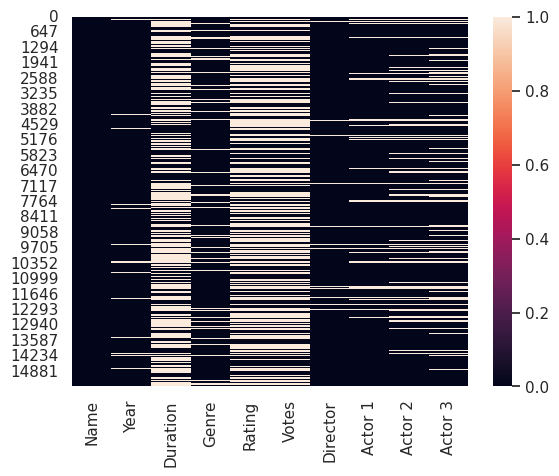

In [10]:
print(movies.shape)
movies.info()
print(movies.describe)
print(movies.isnull().sum())
sns.heatmap(movies.isnull())

6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: Rating, Length: 84, dtype: int64


<Axes: xlabel='Rating', ylabel='count'>

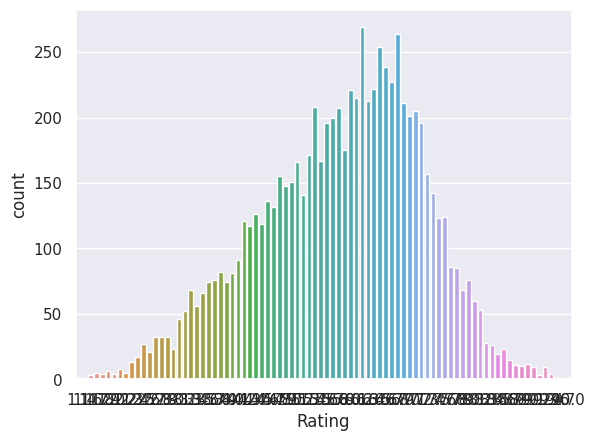

In [11]:
print(movies['Rating'].value_counts())
sns.set()
sns.countplot(x=movies['Rating'])

(2019)    410
(2021)    392
(2018)    381
(2017)    360
(2005)    346
         ... 
(1917)      1
(1913)      1
(1926)      1
(1914)      1
(1924)      1
Name: Year, Length: 102, dtype: int64


<Axes: xlabel='Year', ylabel='count'>

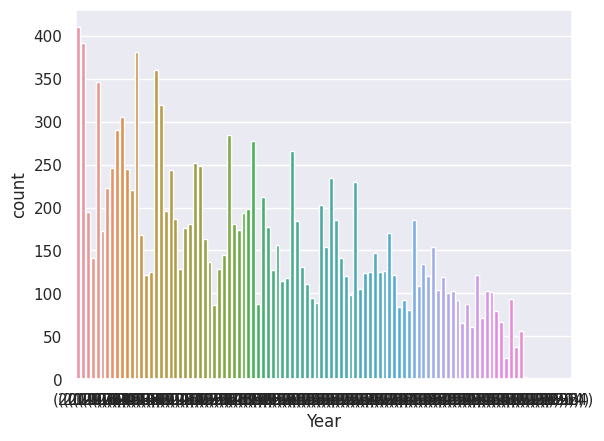

In [12]:
print(movies['Year'].value_counts())
sns.countplot(x=movies['Year'])

8        227
7        224
9        221
6        213
10       175
        ... 
1,754      1
1,208      1
1,148      1
1,277      1
1,496      1
Name: Votes, Length: 2034, dtype: int64


<Axes: xlabel='Votes', ylabel='count'>

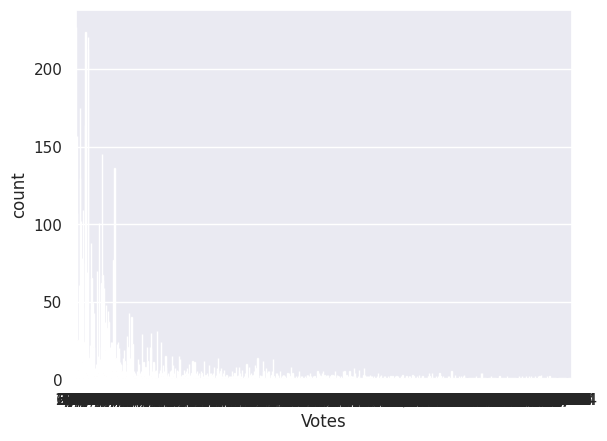

In [13]:
print(movies['Votes'].value_counts())
sns.countplot(x=movies['Votes'])

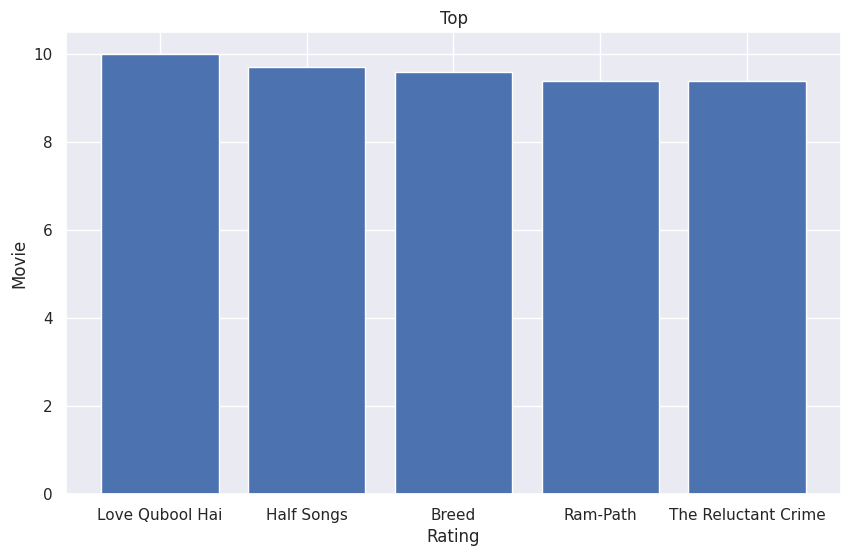

In [14]:
top=movies.sort_values(by='Rating',ascending=False).head()
plt.figure(figsize=(10,6))
plt.bar(top['Name'],top['Rating'])
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title('Top')
#plt.gca().invert_yaxis()
plt.show()

In [16]:
c=LabelEncoder()
movies['Year']= c.fit_transform(movies['Year'])
movies['Rating'] = c.fit_transform(movies['Rating'])
movies['Votes'] = c.fit_transform(movies['Votes'])
movies.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,102,NaN,Drama,84,2034,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),98,109 min,Drama,56,1849,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,100,90 min,"Drama, Musical",84,2034,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,98,110 min,"Comedy, Romance",30,1169,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,89,105 min,Drama,84,2034,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


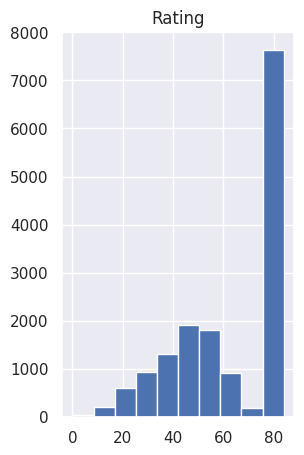

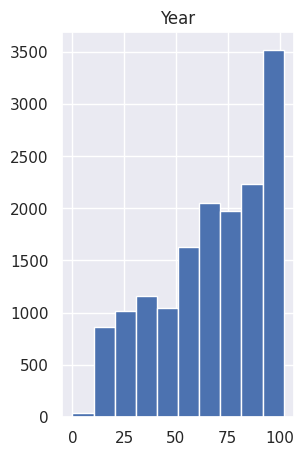

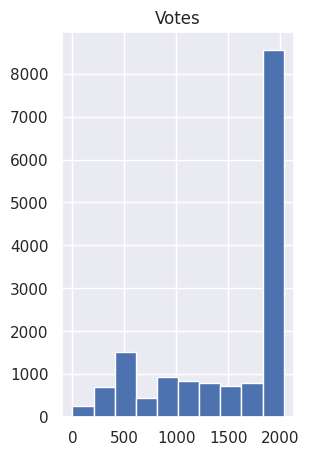

In [17]:
plt.figure(figsize=(3,5))
plt.hist(movies['Rating'])
plt.title('Rating')
plt.show()
plt.figure(figsize=(3,5))
plt.hist(movies['Year'])
plt.title('Year')
plt.show()
plt.figure(figsize=(3,5))
plt.hist(movies['Votes'])
plt.title('Votes')
plt.show()

In [19]:
print(sum(movies['Rating'].isnull()))
print(sum(movies['Year'].isnull()))
print(sum(movies['Votes'].isnull()))

0
0
0


In [20]:
a=movies[['Year','Votes']]
b=movies['Rating']
atrain,atest,btrain,btest=train_test_split(a,b,test_size=0.2,random_state=0)
print(a.shape,atrain.shape,atest.shape)

(15509, 2) (12407, 2) (3102, 2)


In [22]:
mov=LogisticRegression(random_state=0)
mov.fit(atrain,btrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [24]:
atrainpd=mov.predict(atrain)
print(atrainpd)
atestpd=mov.predict(atest)
print(atestpd)
traindacc=accuracy_score(btrain,atrainpd)
print(traindacc)
testdacc=accuracy_score(btest,atestpd)
print(testdacc)

[84 84 84 ... 84 84 84]
[84 84 40 ... 84 84 84]
0.49536551946481827
0.4945196647324307
